In [1]:
import Edgar_package as pa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import csv
import glob
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, Layout, interactive
from scipy.optimize import minimize


k401

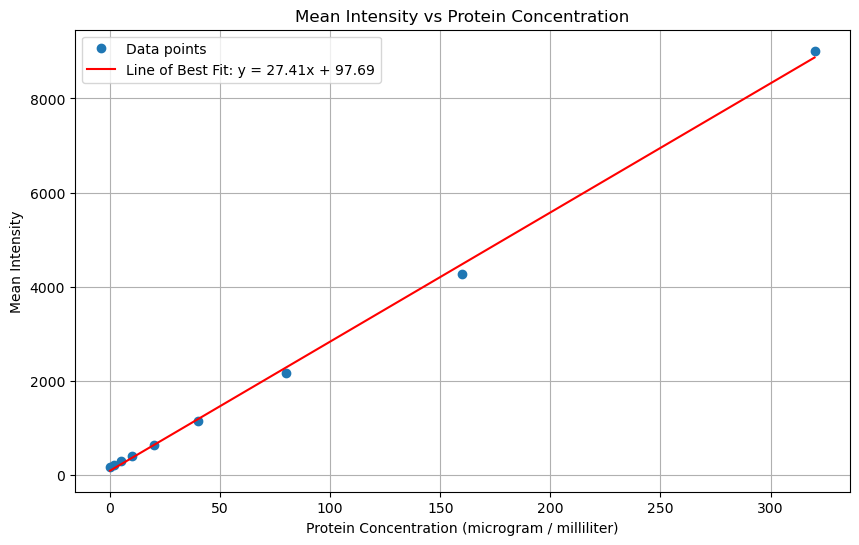

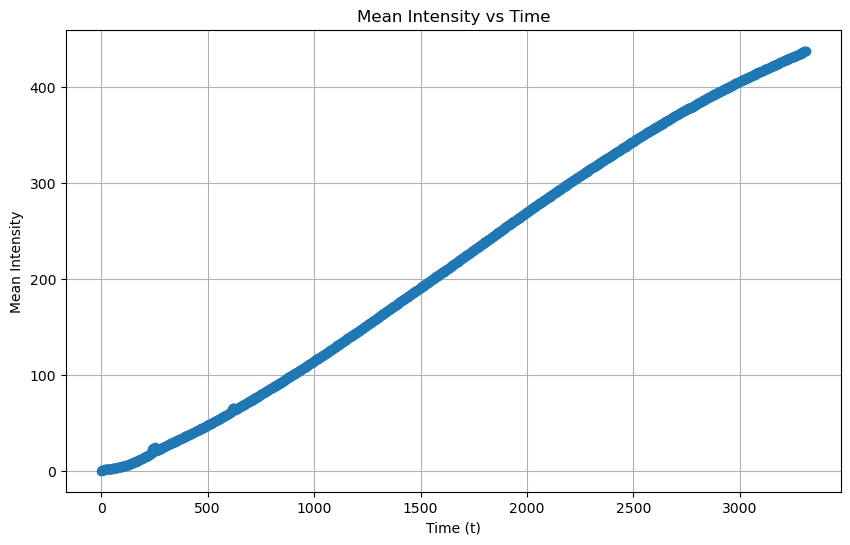

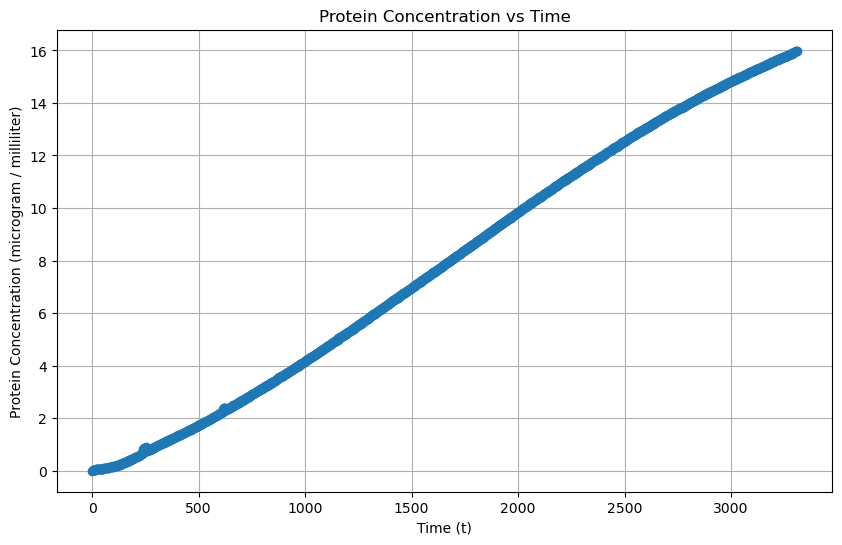

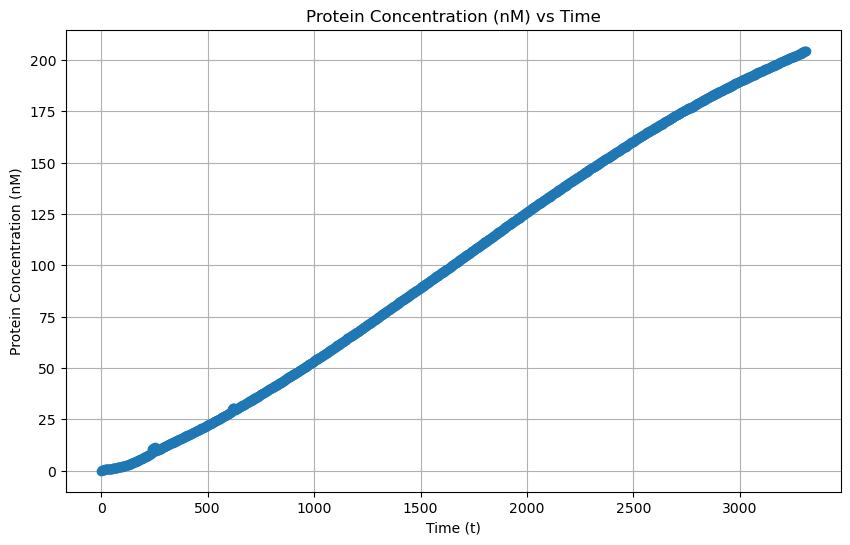

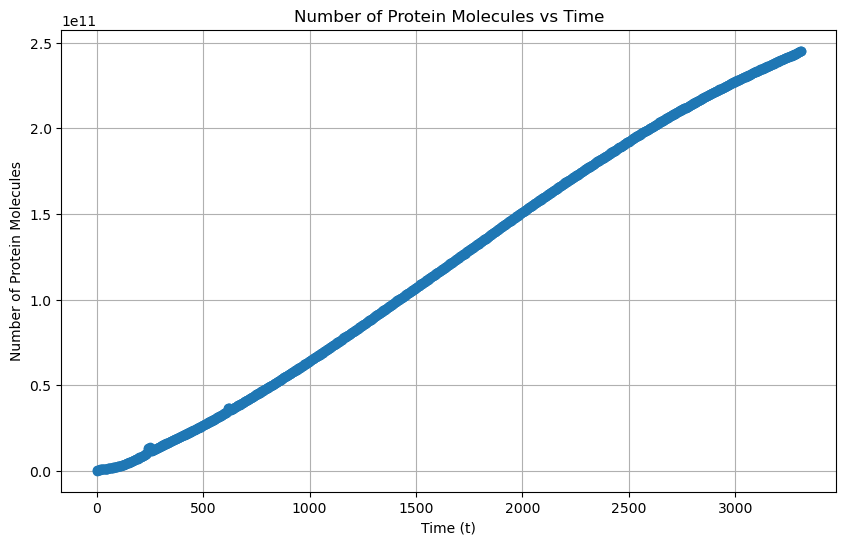

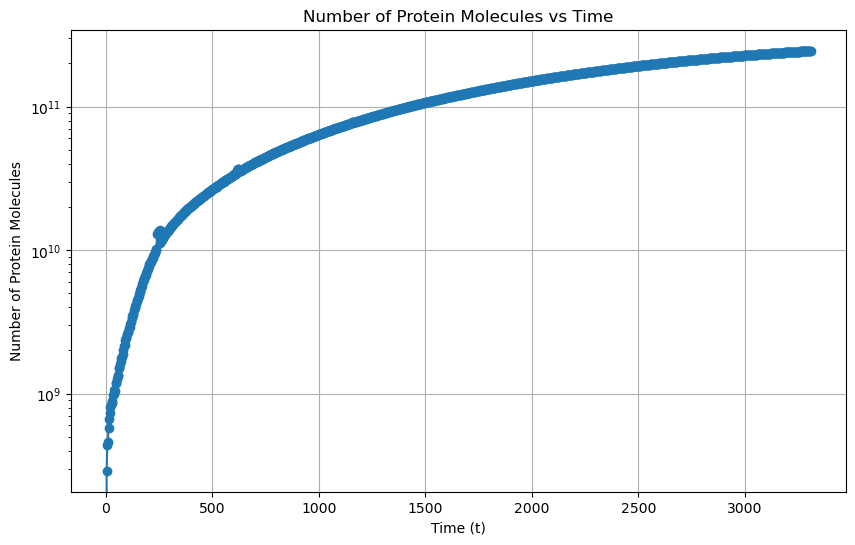

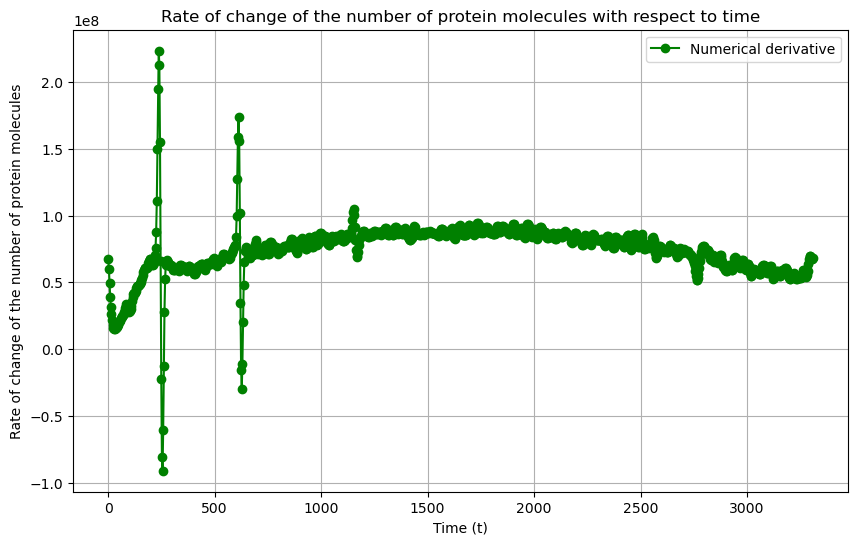

Optimized parameters:
k_TL: 9.927858436697221
k_TX: 0.4457372619018116
R_p: 29.406657909534403
tau_m: 715.1996503124528
K_TL: 5.008676135761341
R: 44.751941764945514
k_deg: 0.025249353707870625
X_p: 1.5680584116740306
K_p: 3.9997569503778365
tau_0: 0.771490600076504
tau_f: 299.9999749517741


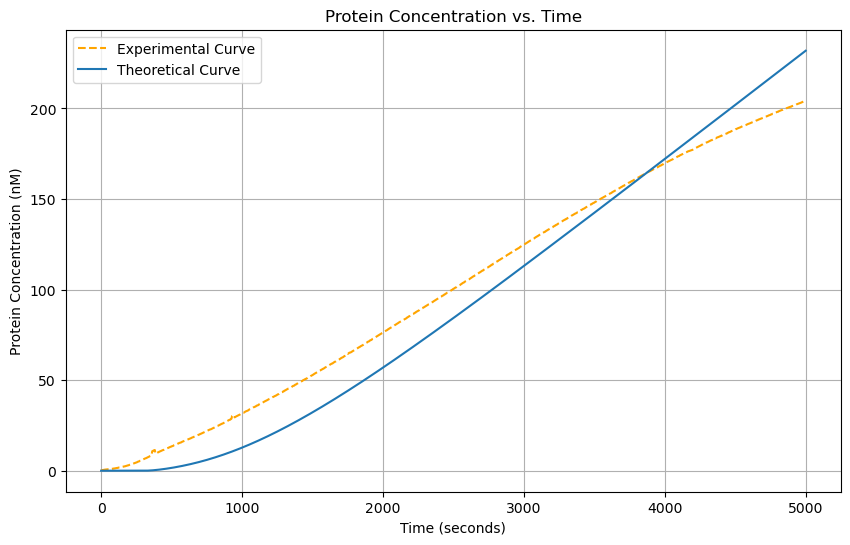

Optimized parameters:
k_TL: 37.54
k_TX: 45.02
R_p: 20.53
tau_m: 4840.12
K_TL: 4.619999999999997
R: 90679.24
k_deg: 40.25
X_p: 18.5
K_p: 53.69
tau_0: 719798.18
tau_f: 73.75


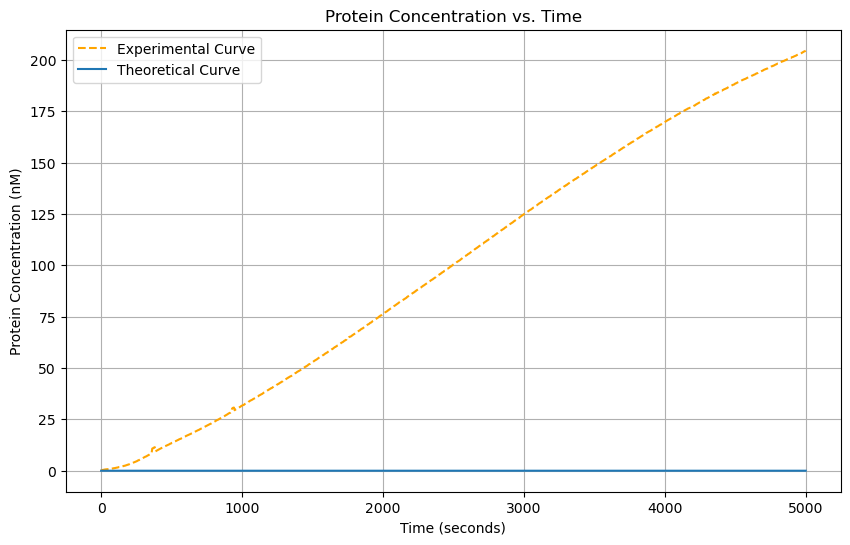

interactive(children=(FloatSlider(value=37.54, description='k_TL (amino acids/s)', layout=Layout(width='900px'…

In [2]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")) # The paths must be sorted
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")) # These paths must also be sorted

# Provide your specific values for N_p, N_m, D, and initial guesses - Known data
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters -- Reasonable guesses
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # Protein production rate (molecules/s)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (units)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0      # Initial time delay (s)
tau_f = 300    # Final time delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f]

# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
pa.runIndividualAnalysis(paths, calibration_curve_paths, 3, 2, 78.2, N_p, N_m, D, initial_guesses, "experimentalData_k401.csv", "optimizedParameters_k401.csv")

kif3

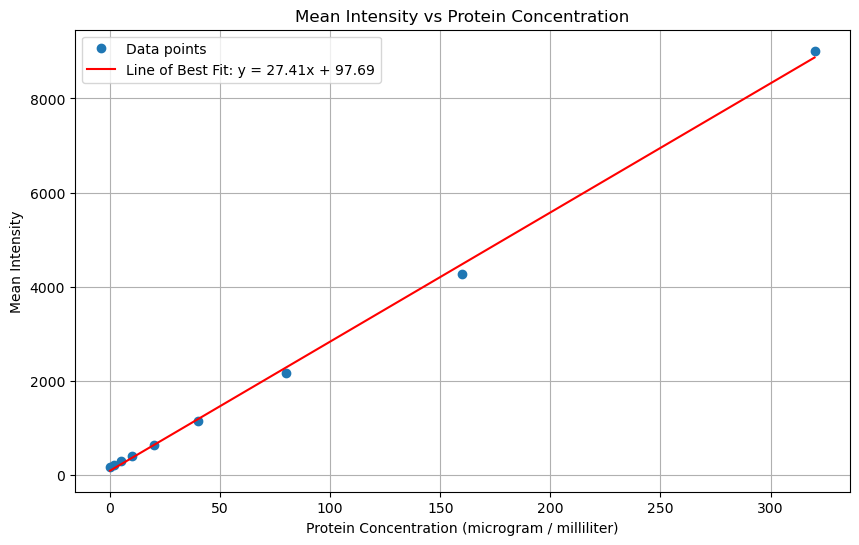

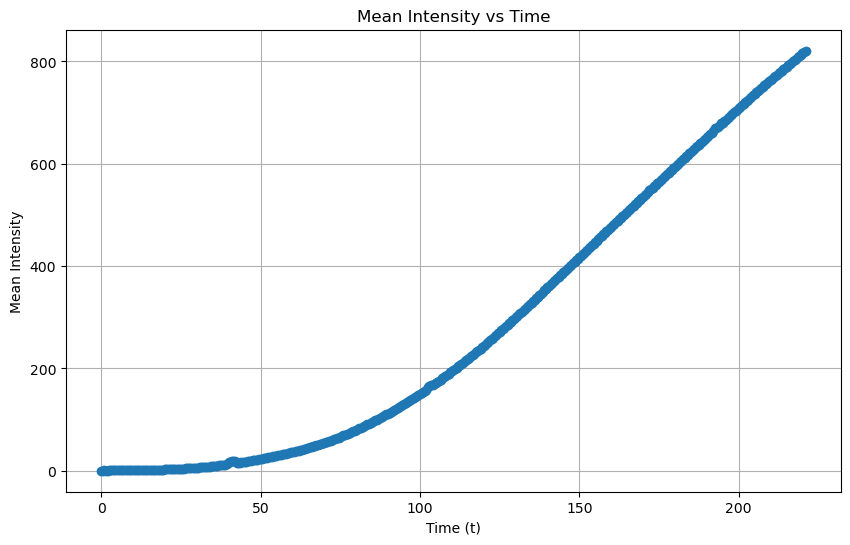

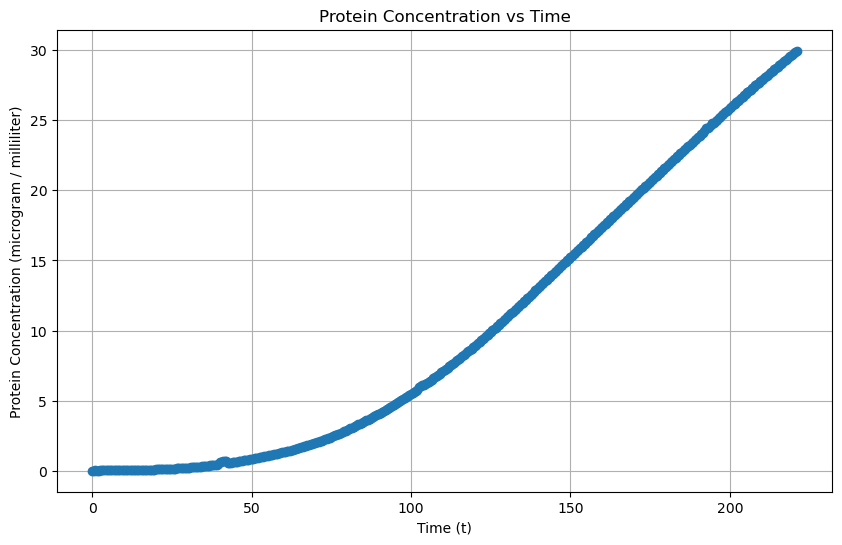

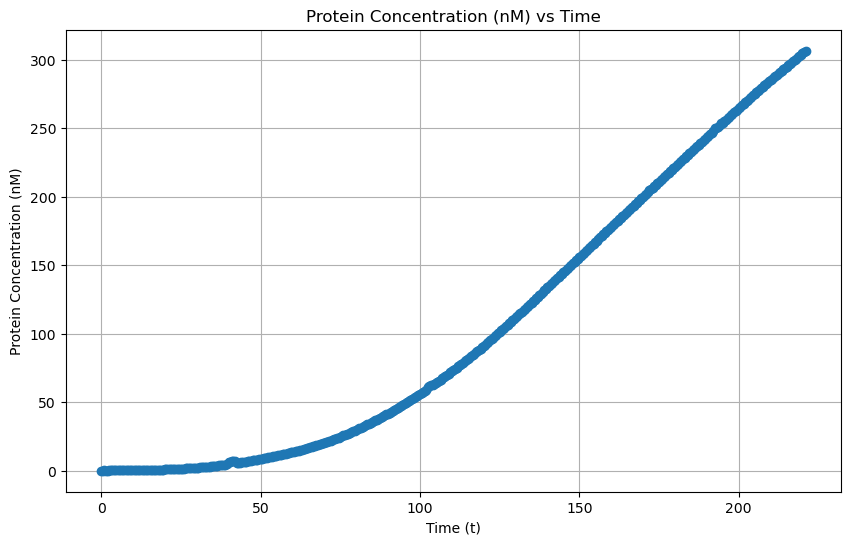

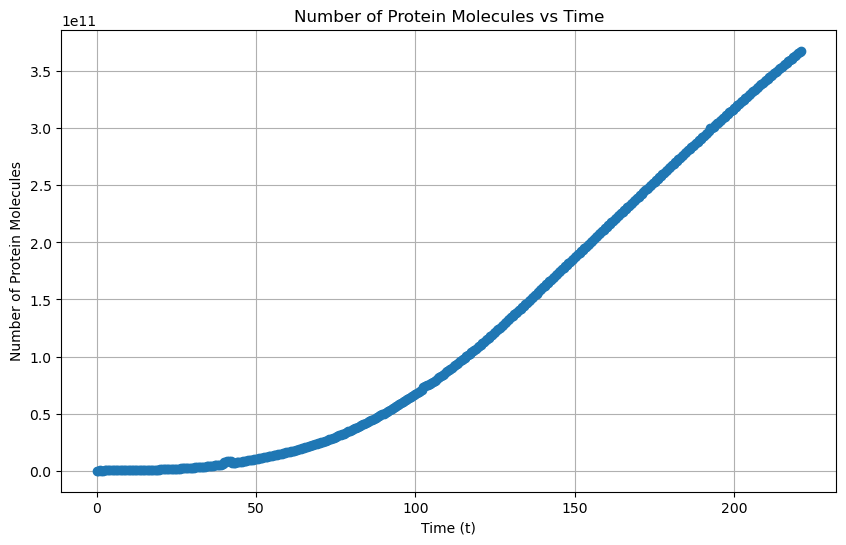

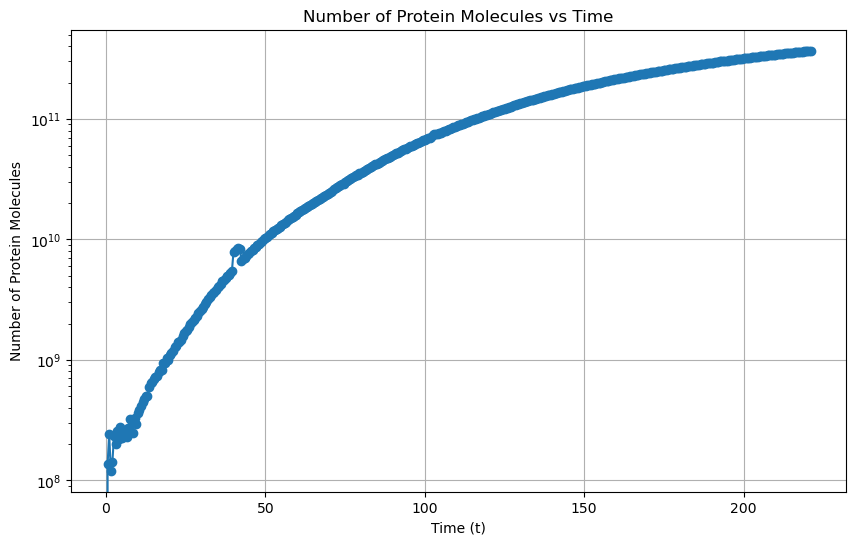

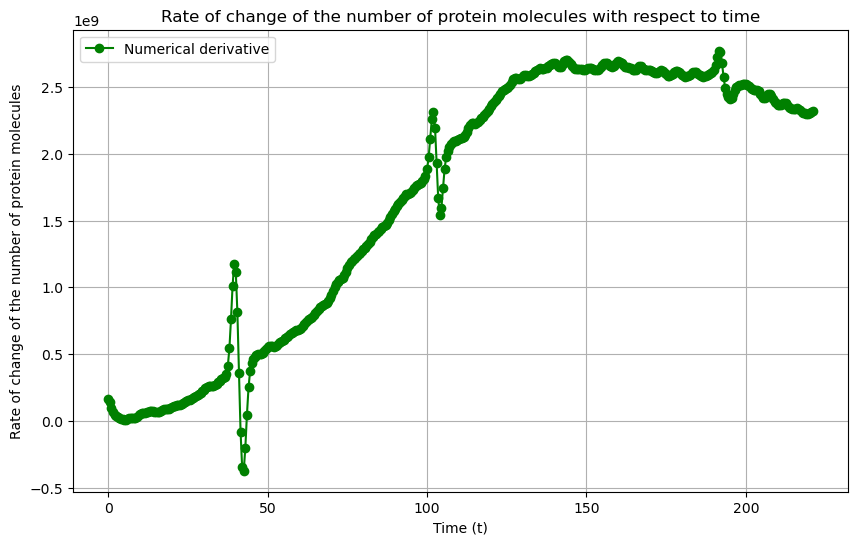

Optimized parameters:
k_TL: 10.005653769054113
k_TX: 1.0008713680342964
R_p: 30.021081747514955
tau_m: 721.5138040941256
K_TL: 4.9960725149764045
R: 80.89915221583215
k_deg: 0.029566485774999762
X_p: 0.9858212439349643
K_p: 4.00161128766662
tau_0: 697.9960079545854
tau_f: 299.9459738919852


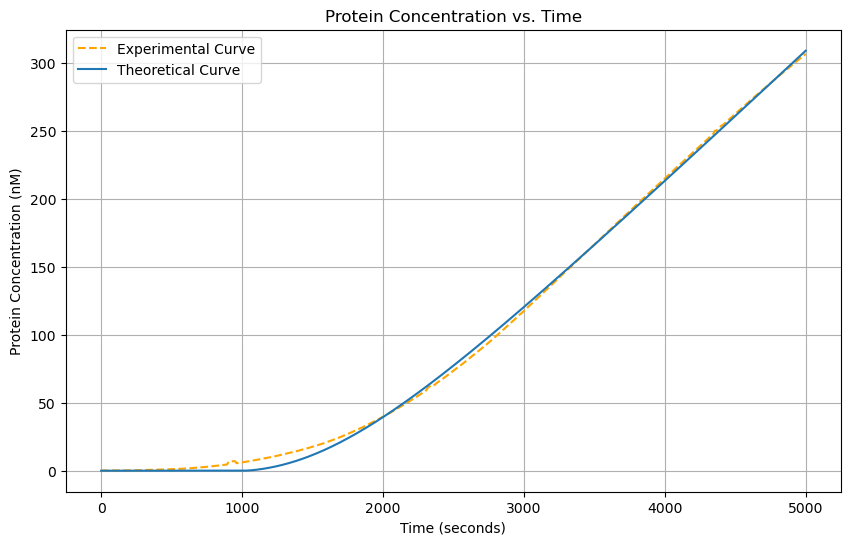

Optimized parameters:
k_TL: 98.04
k_TX: 86.89
R_p: 66.13
tau_m: 6811.52
K_TL: 45.22
R: 7331.169999999998
k_deg: 38.79
X_p: 336.83
K_p: 4.340000000000003
tau_0: 587877.92
tau_f: 1020.53


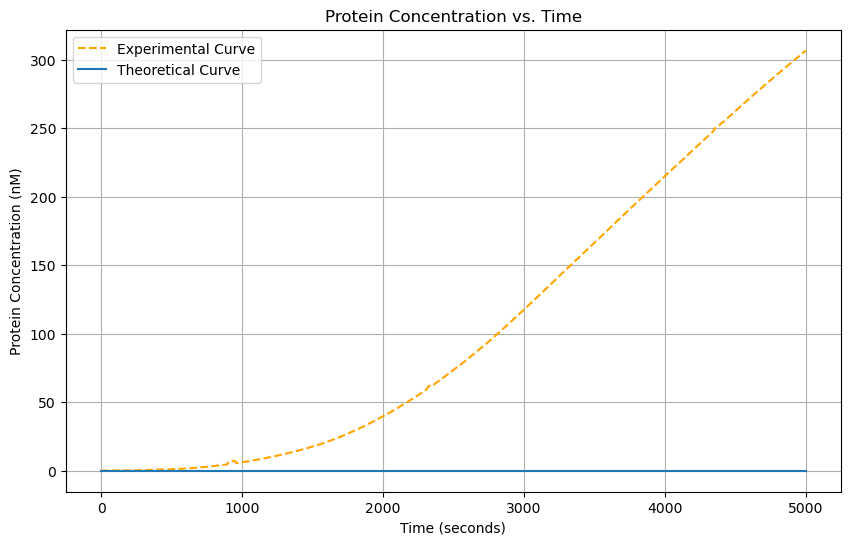

interactive(children=(FloatSlider(value=98.04, description='k_TL (amino acids/s)', layout=Layout(width='900px'…

In [3]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/kif3-activedrops/img_*********_gfp-4x_000.tif"))
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif"))

# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0      # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f]

# wrapper function to run the full analysis
# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
pa.runIndividualAnalysis(paths, calibration_curve_paths, 0.5, 2, 97.7, N_p, N_m, D, initial_guesses, "experimentalData_kif3.csv", "optimizedParameters_kif3.csv")
 

1.- make sure the constrained optimization works for k401 and kif3 with the specified first guesses

2.- the code should generate protein concentration vs time plots for k401 and kif3 (overlapped -- all). Make sure time is in the same units in all plots (minutes)

3.- generate the experimental plot overlapped with the theoretical for each individual protein (k401 and kif3)

4.- everything should run upon the wrapper function

5.- generate the plot with sliders for each individual protein. Set inferred parameters as slider preset value.

6.- create a scatter plot where the x axis is the different parameters names, the y axis is the value, and the color is the protein name.

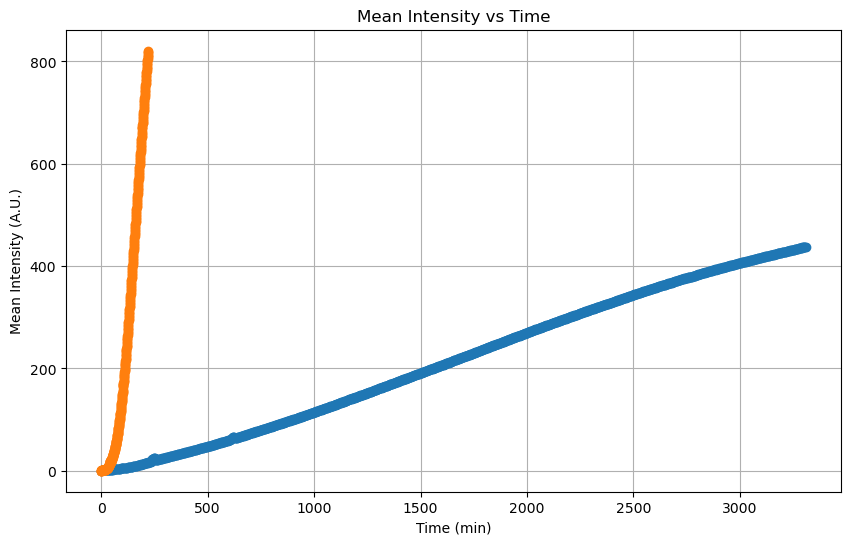

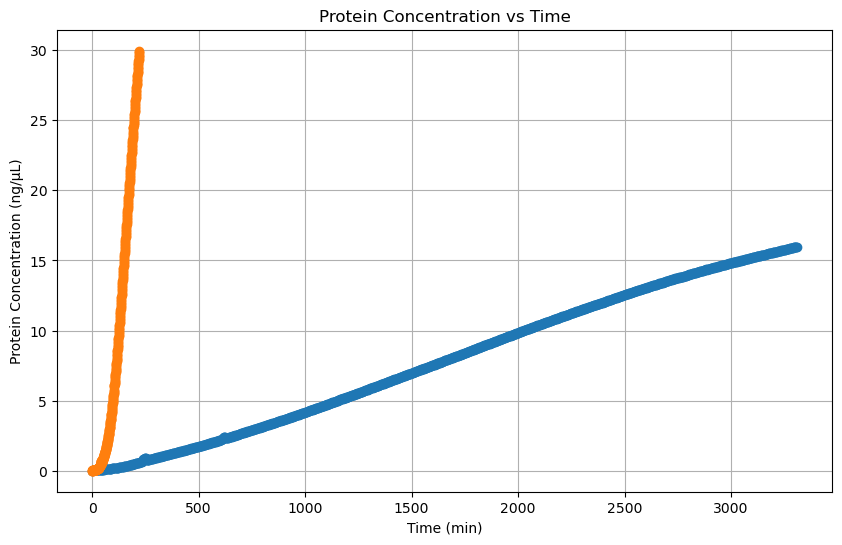

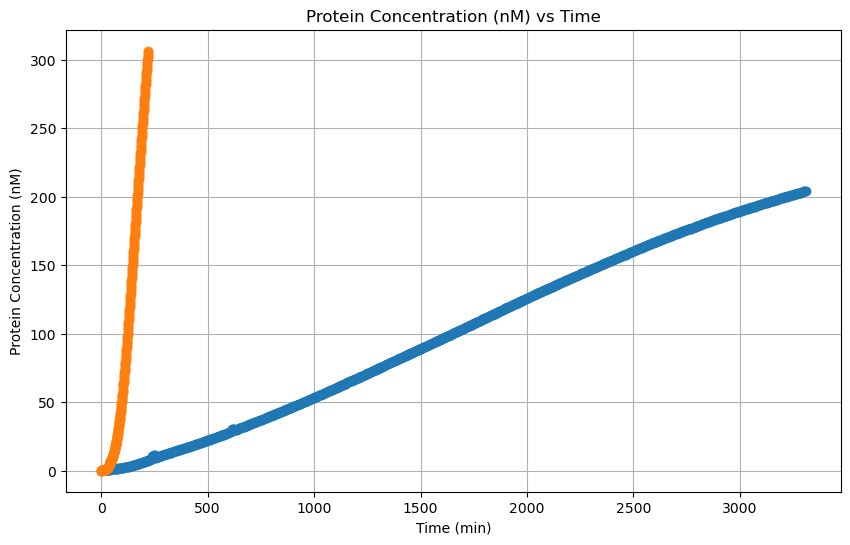

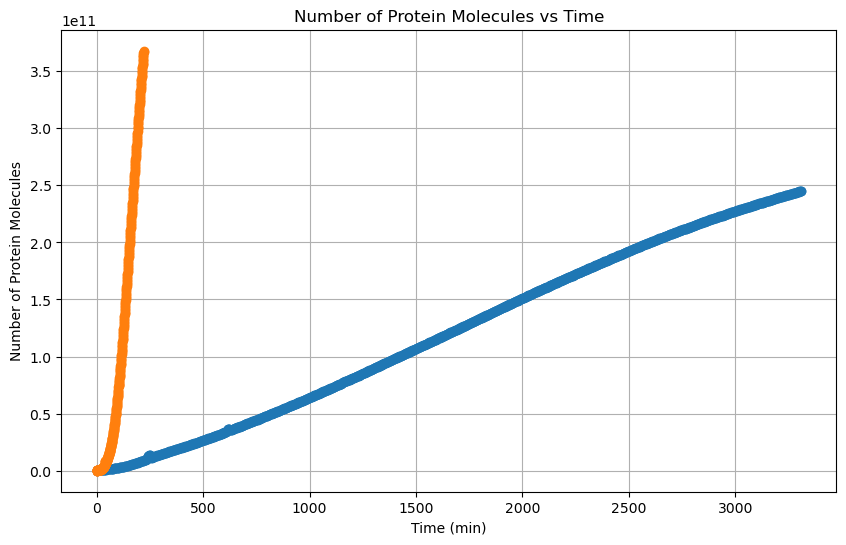

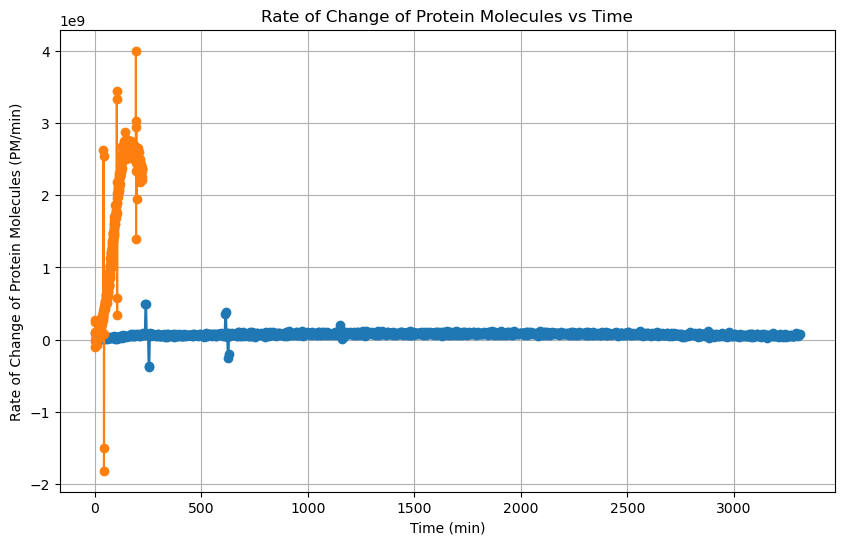

In [4]:
pa.showExperimentalDataTogether()
#pa.showTheoreticalDataTogether()